# RAG 구조

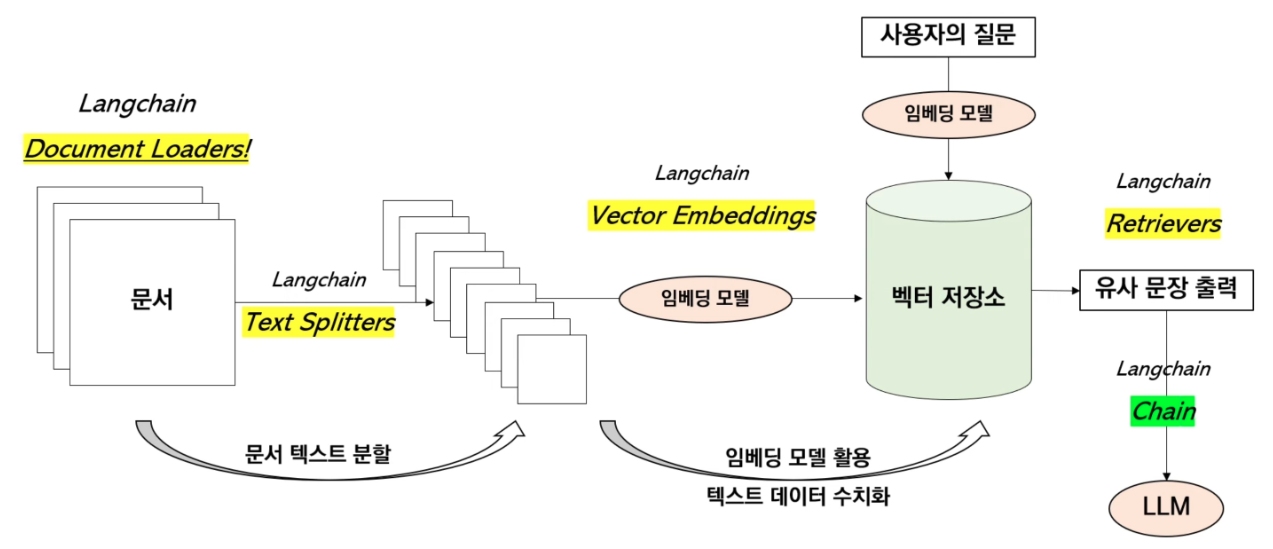

## [Vector Store](https://python.langchain.com/docs/integrations/vectorstores/)
- 벡터 저장소(Vector Store)는 벡터 형태로 표현된 데이터, 즉 임베딩 벡터들을 효율적으로 저장하고 검색할 수 있는 시스템이나 데이터베이스를 의미합니다.
- 자연어 처리(NLP), 이미지 처리, 그리고 기타 다양한 머신러닝 응용 분야에서 생성된 고차원 벡터 데이터를 관리하기 위해 설계되었습니다.
- 벡터 저장소의 핵심 기능은 대규모 벡터 데이터셋에서 빠른 속도로 가장 유사한 항목을 찾아내는 것입니다.

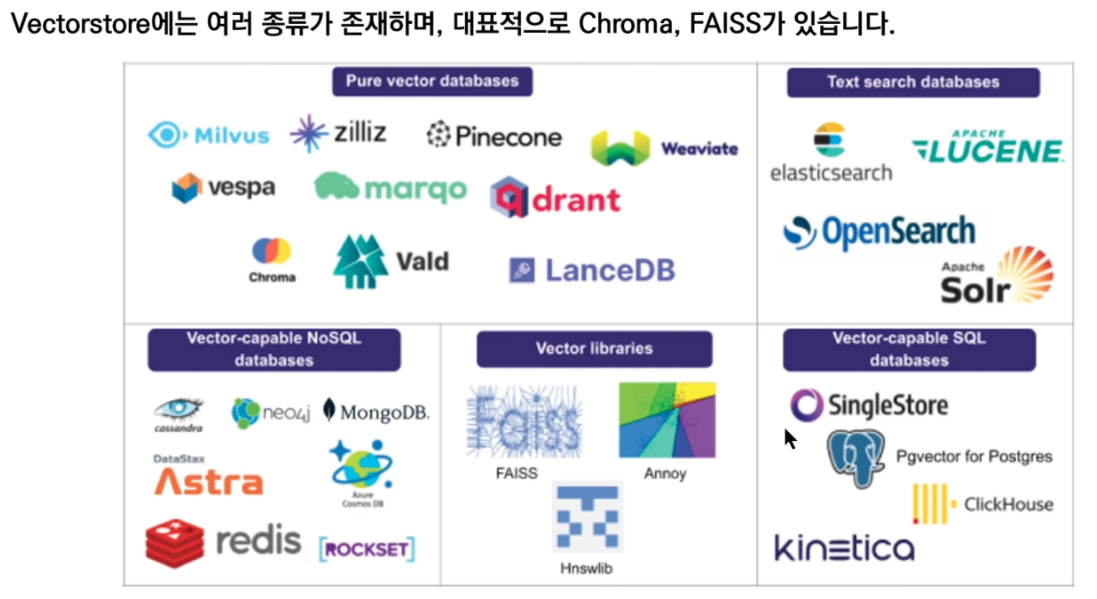

`벡터 저장`
- 임베딩 벡터는 텍스트, 이미지, 소리 등 다양한 형태의 데이터를 벡터 공간에 매핑한 것으로, 데이터의 의미적, 시각적, 오디오적 특성을 수치적으로 표현합니다.
- 이러한 벡터를 효율적으로 저장하기 위해서는 고차원 벡터를 처리할 수 있도록 최적화된 데이터 저장 구조가 필요합니다.

`벡터 검색`
- 저장된 벡터들 중에서 사용자의 쿼리에 가장 유사한 벡터를 빠르게 찾아내는 과정입니다.
- 이를 위해 코사인 유사도, 유클리드 거리, 맨해튼 거리 등 다양한 유사도 측정 방법을 사용할 수 있습니다.
- 코사인 유사도는 방향성을 기반으로 유사도를 측정하기 때문에 텍스트 임베딩 검색에 특히 자주 사용됩니다.

`결과 반환`
- 사용자의 쿼리에 대해 계산된 유사도 점수를 기반으로 가장 유사한 항목들을 순서대로 사용자에게 반환합니다.
- 이 과정에서는 유사도 점수뿐만 아니라, 검색 결과의 관련성, 다양성, 신뢰도 등 다른 요소들을 고려할 수도 있습니다.

## FAISS
- FAISS(Facebook AI Similarity Search)는 Facebook AI Research에 의해 개발된 라이브러리로, 대규모 벡터 데이터셋에서 유사도 검색을 빠르고 효율적으로 수행할 수 있게 해줍니다.
- FAISS는 특히 벡터의 압축된 표현을 사용하여 메모리 사용량을 최소화하면서도 검색 속도를 극대화하는 특징이 있습니다.

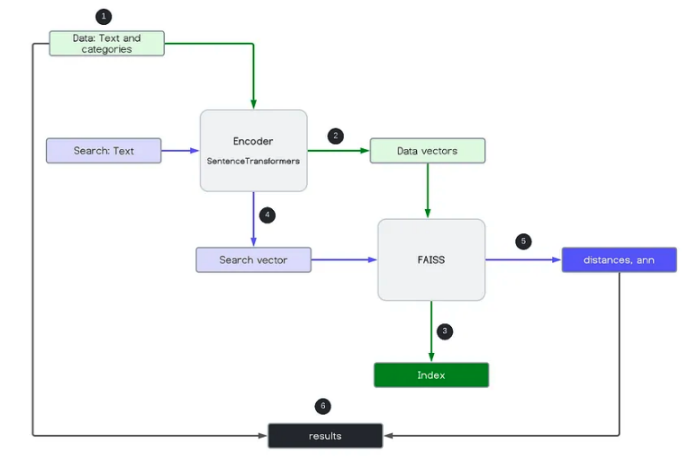

# Setup

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = ''


## 구글 드라이브 연결

In [2]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


## install

In [3]:
!pip install langchain langchain_openai langchain_community faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.13
    Uninstalling langchain-core-0.3.13:
      Successfully uninstalled langchain-core-0.3.13
  Attempting unins

# [FAISS 사용법](https://wikidocs.net/234014)

## Loader

In [4]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+"nlp-keywords.txt")

docs = loader.load()
len(docs)

1

## Splitter

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=600, chunk_overlap=0)

In [6]:
split_doc1 = text_splitter.split_documents(docs)
len(split_doc1)

11

## Embedding model

In [7]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

In [8]:
# 임베딩 차원 크기를 계산
dimension_size = len(embeddings.embed_query("hello world"))
print(dimension_size)

1536


## VectorStore 생성
- FAISS는 고성능 벡터 검색 및 클러스터링을 위한 라이브러리입니다.
- 이 클래스는 FAISS를 LangChain의 VectorStore 인터페이스와 통합합니다.
- 임베딩 함수, FAISS 인덱스, 문서 저장소를 조합하여 효율적인 벡터 검색 시스템을 구축할 수 있습니다.

In [9]:
import faiss
from langchain_community.vectorstores import FAISS

### from_documents()
- `from_documents` 클래스 메서드는 문서 리스트와 임베딩 함수를 사용하여 FAISS 벡터 저장소를 생성합니다.
- 매개변수
  - `documents (List[Document])`: 벡터 저장소에 추가할 문서 리스트
  - `embedding (Embeddings)`: 사용할 임베딩 함수
  - `**kwargs`: 추가 키워드 인자

In [10]:
# DB 생성
db_docs = FAISS.from_documents(
    documents=split_doc1, embedding=embeddings)

In [11]:
db_docs.index_to_docstore_id

{0: '1786e163-7e18-4104-9fdd-de39c507e470',
 1: '1f6c3757-678b-4a37-95df-3aaf63d133da',
 2: '6192c91c-29d6-433c-b6fe-c616f3d3b4bf',
 3: '88559bb0-b226-4e61-b037-20a700f4039e',
 4: '2057392b-6d18-479d-8aa2-f6902e484da5',
 5: 'e5c0d033-711e-4eda-89c6-86ac61bdedc8',
 6: 'da016d98-df64-4e20-b0cc-114d4582087e',
 7: '31311766-9782-4980-9d5d-53168a9e9451',
 8: 'fdf2ce61-418f-49c8-a80b-e495d2594e01',
 9: 'f0d7267d-c14f-4d32-8b66-64222282c2ea',
 10: '42c74268-1fb6-4483-8c9c-cd96fc9cb37b'}

In [12]:
db_docs.docstore._dict

{'1786e163-7e18-4104-9fdd-de39c507e470': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer'),
 '1f6c3757-678b-4a37-95df-3aaf63d133da': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장

### from_texts()
- from_texts 클래스 메서드는 텍스트 리스트와 임베딩 함수를 사용하여 FAISS 벡터 저장소를 생성합니다.
- 매개변수
  - `texts (List[str])`: 벡터 저장소에 추가할 텍스트 리스트
  - `embedding (Embeddings)`: 사용할 임베딩 함수
  - `metadatas (Optional[List[dict]])`: 메타데이터 리스트. 기본값은 None
  - `ids (Optional[List[str]])`: 문서 ID 리스트. 기본값은 None
  - `**kwargs`: 추가 키워드 인자

In [13]:
with open(DATA_PATH+'nlp-keywords.txt') as f:
    file = f.read()  # 파일의 내용을 읽어서 file 변수에 저장합니다.


In [14]:
db_texts = FAISS.from_texts(
    [file],
    embedding=embeddings,
    metadatas=[{"source": DATA_PATH+'nlp-keywords.txt'}],
    ids=["nlp-keywords.txt"],
)

In [15]:
db_texts.index_to_docstore_id

{0: 'nlp-keywords.txt'}

In [16]:
db_texts.docstore._dict

{'nlp-keywords.txt': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer\n\n정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nVectorStore\n\n정의: 벡터스토어는 벡터 형식으로 변환된 데이터를 저장하는 시스템입니다. 이는 검색, 분류 및 기타 데이터 분석 작업에 사용됩니다.\n예시: 단어 임베딩 벡터들을 데이터베이스에 저장하여 빠르게 

### FAISS
- 인덱싱 매개변수:
  - `embedding_function (Embeddings)`: 사용할 임베딩 함수
- 클라이언트 매개변수:
  - `index (Any)`: 사용할 FAISS 인덱스
  - `docstore (Docstore)`: 사용할 문서 저장소
  - `index_to_docstore_id (Dict[int, str])`: 인덱스에서 문서 저장소 ID로의 매핑

In [17]:
from langchain_community.docstore.in_memory import InMemoryDocstore

# FAISS 벡터 저장소 생성
db = FAISS(
    embedding_function=embeddings,
    index=faiss.IndexFlatL2(dimension_size),
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [18]:
db.index_to_docstore_id

{}

In [19]:
db.docstore._dict

{}

## 데이터 추가/삭제

### 문서(Document)로부터 추가 (add_documents)
- add_documents 메서드는 벡터 저장소에 문서를 추가하거나 업데이트하는 기능을 제공합니다.
- 매개변수
  - `documents (List[Document])`: 벡터 저장소에 추가할 문서 리스트
  - `**kwargs`: 추가 키워드 인자

In [20]:
len(split_doc1)

11

In [21]:
from langchain_core.documents import Document

# page_content, metadata 지정
db.add_documents(
    split_doc1,
    ids=[f"idx{str(idx)}" for idx in range(len(split_doc1))],
)

['idx0',
 'idx1',
 'idx2',
 'idx3',
 'idx4',
 'idx5',
 'idx6',
 'idx7',
 'idx8',
 'idx9',
 'idx10']

In [22]:
# 추가된 데이터를 확인
db.index_to_docstore_id

{0: 'idx0',
 1: 'idx1',
 2: 'idx2',
 3: 'idx3',
 4: 'idx4',
 5: 'idx5',
 6: 'idx6',
 7: 'idx7',
 8: 'idx8',
 9: 'idx9',
 10: 'idx10'}

In [23]:
# 저장된 문서의 ID: Document 확인
db.docstore._dict

{'idx0': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer'),
 'idx1': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할합니다.\n연관키워드: 토큰화, 자연어 처리

### 텍스트로부터 추가 (add_texts)
- add_texts 메서드는 텍스트를 임베딩하고 벡터 저장소에 추가하는 기능을 제공합니다.
- 매개변수
  - `texts (Iterable[str])`: 벡터 저장소에 추가할 텍스트 이터러블
  - `metadatas (Optional[List[dict]])`: 텍스트와 연관된 메타데이터 리스트 (선택적)
  - `ids (Optional[List[str]])`: 텍스트의 고유 식별자 리스트 (선택적)
  - `**kwargs`: 추가 키워드 인자

In [24]:
# 신규 데이터를 추가
db.add_texts(
    ["이번엔 텍스트 데이터를 추가합니다.", "추가한 2번째 텍스트 데이터 입니다."],
    metadatas=[{"source": "mydata.txt"}, {"source": "mydata.txt"}],
    ids=["new_doc2", "new_doc3"],
)

['new_doc2', 'new_doc3']

In [25]:
# 추가된 데이터를 확인
db.index_to_docstore_id

{0: 'idx0',
 1: 'idx1',
 2: 'idx2',
 3: 'idx3',
 4: 'idx4',
 5: 'idx5',
 6: 'idx6',
 7: 'idx7',
 8: 'idx8',
 9: 'idx9',
 10: 'idx10',
 11: 'new_doc2',
 12: 'new_doc3'}

### 문서 삭제 (Delete Documents)
- delete 메서드는 벡터 저장소에서 지정된 ID에 해당하는 문서를 삭제하는 기능을 제공합니다.
- 매개변수
  - `ids (Optional[List[str]])`: 삭제할 문서의 ID 리스트
  - `**kwargs`: 추가 키워드 인자 (이 메서드에서는 사용되지 않음)

In [26]:
ids=["new_doc2", "new_doc3"]

# id 로 삭제
db.delete(ids)

True

In [27]:
# 삭제된 결과를 출력
db.index_to_docstore_id

{0: 'idx0',
 1: 'idx1',
 2: 'idx2',
 3: 'idx3',
 4: 'idx4',
 5: 'idx5',
 6: 'idx6',
 7: 'idx7',
 8: 'idx8',
 9: 'idx9',
 10: 'idx10'}

## VectorStore 저장/로드

### 로컬 저장 (Save Local)
- save_local 메서드는 FAISS 인덱스, 문서 저장소, 그리고 인덱스-문서 ID 매핑을 로컬 디스크에 저장하는 기능을 제공합니다.
- 매개변수
  - `folder_path (str)`: 저장할 폴더 경로
  - `index_name (str)`: 저장할 인덱스 파일 이름 (기본값: "index")

In [28]:
# 로컬 Disk 에 저장
db.save_local(folder_path="faiss_db", index_name="faiss_index")

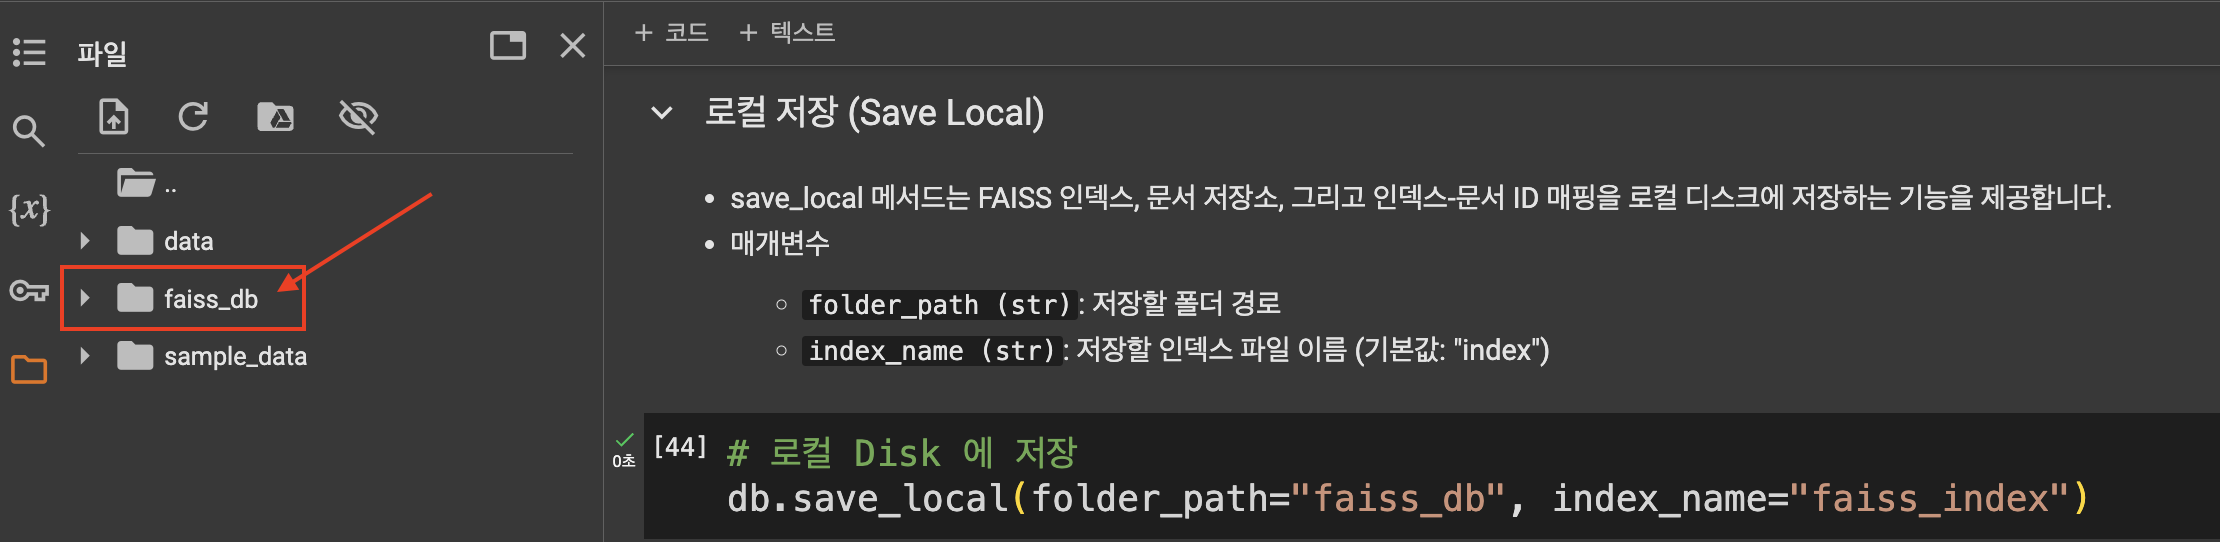

### 로컬에서 불러오기 (Load Local)
- load_local 클래스 메서드는 로컬 디스크에 저장된 FAISS 인덱스, 문서 저장소, 그리고 인덱스-문서 ID 매핑을 불러오는 기능을 제공합니다.
- 매개변수
  - `folder_path (str)`: 불러올 파일들이 저장된 폴더 경로
  - `embeddings (Embeddings)`: 쿼리 생성에 사용할 임베딩 객체
  - `index_name (str)`: 불러올 인덱스 파일 이름 (기본값: "index")
  - `allow_dangerous_deserialization (bool)`: pickle 파일 역직렬화 허용 여부 (기본값: False)

In [29]:
# 저장된 데이터를 로드
loaded_db = FAISS.load_local(
    folder_path="faiss_db",
    index_name="faiss_index",
    embeddings=embeddings,
    allow_dangerous_deserialization=True,
)

In [30]:
# 로드된 데이터를 확인
loaded_db.index_to_docstore_id

{0: 'idx0',
 1: 'idx1',
 2: 'idx2',
 3: 'idx3',
 4: 'idx4',
 5: 'idx5',
 6: 'idx6',
 7: 'idx7',
 8: 'idx8',
 9: 'idx9',
 10: 'idx10'}

In [31]:
loaded_db.docstore._dict

{'idx0': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer'),
 'idx1': Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할합니다.\n연관키워드: 토큰화, 자연어 처리

## 검색

### 유사도 검색 (Similarity Search)
- `similarity_search` 메서드는 주어진 쿼리와 가장 유사한 문서들을 검색하는 기능을 제공합니다.
- 매개변수
  - `query (str)`: 유사한 문서를 찾기 위한 검색 쿼리 텍스트
  - `k (int)`: 반환할 문서 수. 기본값은 4
  - `filter (Optional[Union[Callable, Dict[str, Any]]])`: 메타데이터 필터링 함수 또는 딕셔너리. 기본값은 None
  - `fetch_k (int)`: 필터링 전에 가져올 문서 수. 기본값은 20
  - `**kwargs`: 추가 키워드 인자

In [32]:
db = FAISS.from_documents(
    documents=split_doc1, embedding=embeddings)

In [33]:
db.index_to_docstore_id

{0: 'd083a85e-7efd-43e8-9e06-6b9073176d65',
 1: '76779524-a736-4be2-b3d8-062361647f15',
 2: '25d77ca4-98f6-494e-82b8-7ad411cce650',
 3: 'ae27e14b-7842-4093-84dc-626b9e24728c',
 4: 'd4f3466e-ce38-4e90-adf8-eb87d904a839',
 5: '42068a5b-b46a-443c-8cb0-691ca8c60b40',
 6: '7e7bfbc3-47ca-47de-a3b4-049b57eb368d',
 7: 'd48f91c7-0735-4f43-9dc9-c72d40879f4d',
 8: '7d9a835a-0f4b-4451-a5c8-be0979348c06',
 9: 'b8f45a69-0a74-4464-ba62-b7b557a6f6ec',
 10: 'e265823e-b1af-438e-a830-8360abae2f7a'}

In [34]:
db.docstore._dict[db.index_to_docstore_id[0]]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer')

#### 유사도 검색

In [35]:
# 유사도 검색
result = db.similarity_search("TF IDF 에 대하여 알려줘")
len(result)

4

In [36]:
result

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정

#### k 값 지정

In [37]:
# k 값 지정
result = db.similarity_search("TF IDF 에 대하여 알려줘", k=2)
len(result)

2

In [38]:
result

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정

#### filter 사용

In [39]:
# filter 사용
result = db.similarity_search(
    "TF IDF 에 대하여 알려줘", filter={"source": DATA_PATH+"nlp-keywords.txt"}, k=2
)
len(result)

2

In [40]:
result

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정

### [최대 한계 관련성(Maximum Marginal Relevance, MMR)](https://wikidocs.net/231585)
- 정보 검색이나 문서 요약에서 사용되는 알고리즘으로, 문서의 관련성과 다양성을 동시에 고려하는 방법.
- 선택된 문서가 질의(query)에 얼마나 관련이 있는지(Relevance), 그리고 이미 선택된 문서들과 얼마나 다른지(Diversity)를 계산하여 최적의 문서를 선정.
- MMR 알고리즘은 질의에 대한 관련성이 높은 문서를 찾으면서도, 이미 선택된 문서들과는 상이한 내용을 가진 문서를 선호함으로써, 결과의 다양성을 보장함.

예를 들어 사용자가 주제에 대해 폭넓은 정보를 얻고자 할 때 유용하며, 모든 문서가 같은 내용을 반복하지 않도록 하는 데에 목적이 있음.

MMR의 주요 매개변수:
- `query`: 사용자로부터 입력받은 검색 쿼리입니다.
- `k`: 최종적으로 선택할 문서의 수입니다. 이 매개변수는 반환할 문서의 총 개수를 결정합니다.
- `fetch_k`: MMR 알고리즘을 수행할 때 고려할 상위 문서의 수입니다. 이는 초기 후보 문서 집합의 크기를 의미하며, 이 중에서 MMR에 의해 최종 문서가 k개 만큼 선택됩니다.
- `lambda_mult`: 쿼리와의 유사성과 선택된 문서 간의 다양성 사이의 균형을 조절합니다. $(\lambda = 1)$은 유사성만 고려하며, $(\lambda = 0)$은 다양성만을 최대화합니다.

In [41]:
result = db.max_marginal_relevance_search(
    "TF IDF 에 대하여 알려줘", k=4, fetch_k=10)

In [42]:
len(result)

4

In [43]:
result

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='GPT (Generative Pretrained Transformer)\n\n정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.\n예시: 사용자가 제공한 질문에 대해 자세한 답변을 생성하는 챗봇은 G

## FAISS 객체 병합 (Merge From)
- merge_from 메서드는 현재 FAISS 객체에 다른 FAISS 객체를 병합하는 기능을 제공합니다.
- 매개변수
  - `target (FAISS)`: 현재 객체에 병합할 대상 FAISS 객체

In [44]:
# db 의 데이터 확인
db.index_to_docstore_id

{0: 'd083a85e-7efd-43e8-9e06-6b9073176d65',
 1: '76779524-a736-4be2-b3d8-062361647f15',
 2: '25d77ca4-98f6-494e-82b8-7ad411cce650',
 3: 'ae27e14b-7842-4093-84dc-626b9e24728c',
 4: 'd4f3466e-ce38-4e90-adf8-eb87d904a839',
 5: '42068a5b-b46a-443c-8cb0-691ca8c60b40',
 6: '7e7bfbc3-47ca-47de-a3b4-049b57eb368d',
 7: 'd48f91c7-0735-4f43-9dc9-c72d40879f4d',
 8: '7d9a835a-0f4b-4451-a5c8-be0979348c06',
 9: 'b8f45a69-0a74-4464-ba62-b7b557a6f6ec',
 10: 'e265823e-b1af-438e-a830-8360abae2f7a'}

### db2 생성

In [45]:
loader2 = TextLoader(DATA_PATH+"finance-keywords.txt")

In [46]:
split_doc2 = loader2.load_and_split(text_splitter)
len(split_doc2)

6

In [47]:
# 새로운 FAISS 벡터 저장소 생성
db2 = FAISS.from_documents(documents=split_doc2, embedding=OpenAIEmbeddings())

In [48]:
# db2 의 데이터 확인
db2.index_to_docstore_id

{0: '561bdad5-3302-4897-88dc-4bdada724c80',
 1: 'f8458e97-dd15-4c39-b399-0b4ad58a06e2',
 2: 'e2414ad9-5c04-46d7-a18b-8494b19487f1',
 3: '87f408f5-b2c7-4da9-a6a0-5cc08089eae3',
 4: '3b65b7fd-11d2-4982-92a7-226e90ae2f3e',
 5: 'ad575eda-3e29-4b3e-ba5f-6596bee04c4c'}

### 병합

In [49]:
# db + db2 를 병합
db.merge_from(db2)

In [50]:
# 병합된 데이터 확인
db.index_to_docstore_id

{0: 'd083a85e-7efd-43e8-9e06-6b9073176d65',
 1: '76779524-a736-4be2-b3d8-062361647f15',
 2: '25d77ca4-98f6-494e-82b8-7ad411cce650',
 3: 'ae27e14b-7842-4093-84dc-626b9e24728c',
 4: 'd4f3466e-ce38-4e90-adf8-eb87d904a839',
 5: '42068a5b-b46a-443c-8cb0-691ca8c60b40',
 6: '7e7bfbc3-47ca-47de-a3b4-049b57eb368d',
 7: 'd48f91c7-0735-4f43-9dc9-c72d40879f4d',
 8: '7d9a835a-0f4b-4451-a5c8-be0979348c06',
 9: 'b8f45a69-0a74-4464-ba62-b7b557a6f6ec',
 10: 'e265823e-b1af-438e-a830-8360abae2f7a',
 11: '561bdad5-3302-4897-88dc-4bdada724c80',
 12: 'f8458e97-dd15-4c39-b399-0b4ad58a06e2',
 13: 'e2414ad9-5c04-46d7-a18b-8494b19487f1',
 14: '87f408f5-b2c7-4da9-a6a0-5cc08089eae3',
 15: '3b65b7fd-11d2-4982-92a7-226e90ae2f3e',
 16: 'ad575eda-3e29-4b3e-ba5f-6596bee04c4c'}

# FAISS with Retriever

## Loader

In [51]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import TextLoader

loader = DirectoryLoader(path=DATA_PATH, glob='*.txt'
                    , show_progress=True, loader_cls=TextLoader)

In [52]:
docs = loader.load()
len(docs)

100%|██████████| 2/2 [00:00<00:00, 344.61it/s]


2

## Splitter

In [53]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# 텍스트 분할
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=600,
    chunk_overlap=200,
    encoding_name='o200k_base'
)

In [54]:
splitted_docs = text_splitter.split_documents(docs)

len(splitted_docs)

11

## Embedding model

In [55]:
from langchain_openai import OpenAIEmbeddings

In [56]:
# 임베딩
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# 임베딩 차원 크기를 계산
dimension_size = len(embeddings.embed_query("hello world"))
print(dimension_size)

1536


## Vector DB - FAISS

In [57]:
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore

In [58]:
db = FAISS.from_documents(
    documents=splitted_docs, embedding=embeddings)

In [59]:
db.index_to_docstore_id

{0: '38caf207-68de-4441-a5f2-053a2a0c7612',
 1: '50f1de50-c60f-41d9-81a1-2d4bc0de1f28',
 2: 'c59784f8-f747-4994-9ec5-a860c0b9d332',
 3: '43b3bbf3-4d28-4732-88d2-43bf34ec19e6',
 4: '68b50317-b5f9-4cda-9b15-8524073c941a',
 5: 'ed694101-8308-4265-9e2b-0e169bb10d0e',
 6: '70dd661d-d7d8-4190-8f06-78613285719e',
 7: '77087d42-be0a-4546-b6fb-7aaa5c9f52c7',
 8: 'dff0e40f-8c2d-4c48-88e9-d568a4b14732',
 9: '2f309faa-18f3-45b3-be0f-4cff75a80a85',
 10: '3b5c65df-86ff-44b5-b1ec-27ea85c98411'}

## 검색기로 변환 (as_retriever)
- as_retriever 메서드는 현재 벡터 저장소를 기반으로 VectorStoreRetriever 객체를 생성하는 기능을 제공합니다.

### 유사도

In [60]:
# 검색기로 변환
retriever = db.as_retriever()

In [61]:
# 검색 수행
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content='HuggingFace\n\n정의: HuggingFace는 자연어 처리를 위한 다양한 사전 훈련된 모델과 도구를 제공하는 라이브러리입니다. 이는 연구자와 개발자들이 쉽게 NLP 작업을 수행할 수 있도록 돕습니다.\n예시: HuggingFace의 Transformers 라이브러리를 사용하여 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.\n연관키워드: 자연어 처리, 딥러닝, 라이브러리\n\nDigital Transformation\n\n정의: 디지털 변환은 기술을 활용하여 기업의 서비스, 문화, 운영을 혁신하는 과정입니다. 이는 비즈니스 모델을 개선하고 디지털 기술을 통해 경쟁력을 높이는 데 중점을 둡니다.\n예시: 기업이 클라우드 컴퓨팅을 도입하여 데이터 저장과 처리를 혁신하는 것은 디지털 변환의 예입니다.\n연관키워드: 혁신, 기술, 비즈니스 모델\n\nCrawling\n\n정의: 크롤링은 자동화된 방식으로 웹 페이지를 방문하여 데이터를 수집하는 과정입니다. 이는 검색 엔진 최적화나 데이터 분석에 자주 사용됩니다.\n예시: 구글 검색 엔진이 인터넷 상의 웹사이트를 방문하여 콘텐츠를 수집하고 인덱싱하는 것이 크롤링입니다.\n연관키워드: 데이터 수집, 웹 스크래핑, 검색 엔진\n\nWord2Vec\n\n정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈

### MMR
- 다양성이 높은 더 많은 문서 검색
  - `k`: 반환할 문서 수 (기본값: 4)
  - `fetch_k`: MMR 알고리즘에 전달할 문서 수 (기본값: 20)
  - `lambda_mult`: MMR 결과의 다양성 조절 (0~1, 기본값: 0.5, 0: 유사도 점수만 고려, 1: 다양성만 고려)

In [62]:
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 6, "lambda_mult": 0.25, "fetch_k": 10}
)

In [63]:
# 검색 수행
retriever.invoke("TF IDF 에 대하여 알려줘")

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/vector_db/nlp-keywords.txt'}, page_content="TF-IDF (Term Frequency-Inverse Document Frequency)\n\n정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame\n\n정의: DataFrame은 행과 열로 이루어진 테이블 형태의 데이터 구조로, 주로 데이터 분석 및 처리에 사용됩니다.\n예시: 판다스 라이브러리에서 DataFrame은 다양한 데이터 타입의 열을 가질 수 있으며, 데이터 조작과 분석을 용이하게 합니다.\n연관키워드: 데이터 분석, 판다스, 데이터 처리\n\nAttention 메커니즘\n\n정의: Attention 메커니즘은 딥러닝에서 중요한 정보에 더 많은 '주의'를 기울이도록 하는 기법입니다. 이는 주로 시퀀스 데이터(예: